<a href="https://colab.research.google.com/github/Romanvia93/traffic_sign_detection/blob/main/Tensorflow/EfficientDet_D1_640x640.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Reference: https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/

In [ ]:
# Use the following package versions for compatibiltiy
!pip install "PyYAML==5.3" "numpy==1.24.3"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.2/268.2 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 22.0 MB/s eta 0:00:00
  Created wheel for PyYAML: filename=PyYAML-5.3-cp310-cp310-linux_x86_64.whl size=44243 sha256=20ced0e4a93bacaa22bde355bdc22fbd21df9038e6b29638b026ea496e6a9802
  Stored in directory: /root/.cache/pip/wheels/0d/72/68/a263cfc14175636cf26bada99f13b735be1b60a11318e08bfc
Successfully built PyYAML
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0.1
    Uninstalling PyYAML-6.0.1:
      Successfully uninstalled PyYAML-6.0.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.12.1 requires py

In [ ]:
import os
import tarfile
from zipfile import ZipFile

In [ ]:
# Create a root working directory

if not os.path.exists("Tensorflow"):
    os.mkdir("Tensorflow")

In [ ]:
# Define model name

MODEL_NAME = "efficientdet_d1_coco17_tpu-32"

## TensorFlow Model Garden

In [ ]:
# Clone model garden

%cd "Tensorflow"
!git clone "https://github.com/tensorflow/models.git"

/content/Tensorflow
Cloning into 'models'...
remote: Enumerating objects: 86933, done.
remote: Counting objects: 100% (687/687), done.
remote: Compressing objects: 100% (347/347), done.
remote: Total 86933 (delta 387), reused 616 (delta 333), pack-reused 86246
Receiving objects: 100% (86933/86933), 599.04 MiB | 23.60 MiB/s, done.
Resolving deltas: 100% (62261/62261), done.


In [ ]:
# Install object detection package

%cd "models/research"

!protoc object_detection/protos/*.proto --python_out=.
%cp object_detection/packages/tf2/setup.py .
!pip install .

/content/Tensorflow/models/research
Processing /content/Tensorflow/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.6/28.6 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.1 MB/s eta 

In [ ]:
# Test if object detection package has been sucessfully installed

!python object_detection/builders/model_builder_tf2_test.py

2023-08-02 16:48:43.548851: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-02 16:48:45.076827: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-02 16:48:51.392629: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-02 16:48:51.955383: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

## Coco API

In [ ]:
# Go back to Tensorflow/

%cd ..
%cd ..

/content/Tensorflow/models
/content/Tensorflow


In [ ]:
# Clone and install CocoAPI

!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
%cp -r pycocotools /content/Tensorflow/models/research/

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 19.81 MiB/s, done.
Resolving deltas: 100% (576/576), done.
/content/Tensorflow/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/Tensorflow/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-cpython-310
creating build/temp.linux-x86_64-cpython-310/pycocotools
x86_64-linux-gnu-gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=for

## Training data

The dataset contains 4 categories:

| Category |
|:-|
|Traffic Light|
|Stop|
|Speed Limit|
|Crosswalk|

In [ ]:
# Go back to Tensorflow/

%cd ..
%cd ..

/content/Tensorflow/cocoapi
/content/Tensorflow


In [ ]:
# Create new directory Tensorflow/data/

if not os.path.exists("data"):
    os.mkdir("data")

# Download dataset to Tensorflow/data/

%cd data
!gdown "https://drive.google.com/uc?export=download&id=1DgDd-PHRYb-y0FGDDXHKbi6ZaGoaTimB"

with ZipFile("archive.zip") as zipfile:
    zipfile.extractall()
!rm "archive.zip"

/content/Tensorflow/data
Downloading...
From: https://drive.google.com/uc?export=download&id=1DgDd-PHRYb-y0FGDDXHKbi6ZaGoaTimB
To: /content/Tensorflow/data/archive.zip
100% 229M/229M [00:05<00:00, 38.3MB/s]


### Split to train, valid and test sets

In [ ]:
# Still in Tensorflow/data/, create train and valid directories

if not os.path.exists("train"):
    os.mkdir("train")
if not os.path.exists("valid"):
    os.mkdir("valid")

In [ ]:
import numpy as np

np.random.seed(42)
all_pngs = os.listdir("./images")

# train:valid ratio is 8:2
train_size = int(len(all_pngs) * .8)

# prepare lists containing of train and validation images
train_pngs = np.random.choice(all_pngs, train_size, replace=False)
train_xmls = [png[:-4]+'.xml' for png in train_pngs]
valid_pngs = np.setdiff1d(all_pngs, train_pngs)
valid_xmls = [png[:-4]+'.xml' for png in valid_pngs]

len(all_pngs), len(train_pngs), len(valid_pngs)

(877, 701, 176)

In [ ]:
import shutil

# Copy train and validation images to the corresponding directories
# images go from Tensorflow/data/images/ to Tensorflow/data/train/ (or valid/)
# annotations go from Tensorflow/data/annotations/ to Tensorflow/data/train/ (or valid/)

for png in train_pngs:
    shutil.copy("images/"+png, "train/")
for xml in train_xmls:
    shutil.copy("annotations/"+xml, "train/")
for png in valid_pngs:
    shutil.copy("images/"+png, "valid/")
for xml in valid_xmls:
    shutil.copy("annotations/"+xml, "valid/")

## Create label map

In [ ]:
# Go back to Tensorflow/

%cd ..

/content/Tensorflow


In [ ]:
# Labels
labels = [{'name':'trafficlight', 'id':1}, {'name':'stop', 'id':2}, {'name':'speedlimit', 'id':3}, {'name':'crosswalk', 'id':4}]

# Create new directory to store lable map file: Tensorflow/training/annotations/
if not os.path.exists("training"):
    os.mkdir("training")
if not os.path.exists("training/annotations"):
    os.mkdir("training/annotations")

# Create and store label map file to the new directory
with open("training/annotations/label_map.pbtxt", 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

## TFRecord

In [ ]:
# Create new directory to store TFRecord generation script: Tensorflow/scripts/

if not os.path.exists("scripts"):
    os.mkdir("scripts")
if not os.path.exists("scripts/preprocessing"):
    os.mkdir("scripts/preprocessing")

In [ ]:
!wget https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/_downloads/da4babe668a8afb093cc7776d7e630f3/generate_tfrecord.py -P scripts/preprocessing

--2023-08-02 16:50:04--  https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/_downloads/da4babe668a8afb093cc7776d7e630f3/generate_tfrecord.py
Resolving tensorflow-object-detection-api-tutorial.readthedocs.io (tensorflow-object-detection-api-tutorial.readthedocs.io)... 104.17.33.82, 104.17.32.82, 2606:4700::6811:2152, ...
Connecting to tensorflow-object-detection-api-tutorial.readthedocs.io (tensorflow-object-detection-api-tutorial.readthedocs.io)|104.17.33.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6410 (6.3K) [text/x-python]
Saving to: ‘scripts/preprocessing/generate_tfrecord.py’

generate_tfrecord.p 100%[===================>]   6.26K  --.-KB/s    in 0s      

2023-08-02 16:50:04 (24.4 MB/s) - ‘scripts/preprocessing/generate_tfrecord.py’ saved [6410/6410]



In [ ]:
# Generate TFRecord files by running the script in Tensorflow/scripts/ and store the generated file in Tensorflow/training/annotations/

%cd scripts/preprocessing
!python generate_tfrecord.py -x /content/Tensorflow/data/train -l /content/Tensorflow/training/annotations/label_map.pbtxt -o /content/Tensorflow/training/annotations/train.record
!python generate_tfrecord.py -x /content/Tensorflow/data/valid -l /content/Tensorflow/training/annotations/label_map.pbtxt -o /content/Tensorflow/training//annotations/valid.record

/content/Tensorflow/scripts/preprocessing
Successfully created the TFRecord file: /content/Tensorflow/training/annotations/train.record
Successfully created the TFRecord file: /content/Tensorflow/training//annotations/valid.record


## Pretrained model

In [ ]:
# go back to Tensorflow/

%cd ..
%cd ..

/content/Tensorflow/scripts
/content/Tensorflow


In [ ]:
# Create new directory to store pretrained model: Tensorflow/pre-trained-models/

if not os.path.exists("pre-trained-models"):
    os.mkdir("pre-trained-models")

# Download pretrained model from model zoo

command = f"wget http://download.tensorflow.org/models/object_detection/tf2/20200711/{MODEL_NAME}.tar.gz -P pre-trained-models"
!{command}

with tarfile.open(f"pre-trained-models/{MODEL_NAME}.tar.gz") as tar:
    tar.extractall("pre-trained-models")

command = f"rm pre-trained-models/{MODEL_NAME}.tar.gz"
!{command}

--2023-08-02 16:50:14--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d1_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.195.128, 2607:f8b0:4001:c11::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.195.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51839363 (49M) [application/x-tar]
Saving to: ‘pre-trained-models/efficientdet_d1_coco17_tpu-32.tar.gz’

efficientdet_d1_coc 100%[===================>]  49.44M  80.8MB/s    in 0.6s    

2023-08-02 16:50:15 (80.8 MB/s) - ‘pre-trained-models/efficientdet_d1_coco17_tpu-32.tar.gz’ saved [51839363/51839363]



## Modify training config

In [ ]:
# Create new directory to save training config file: TensorFlow/training/models/
# Copy config file from TensorFlow/pre-trained-model/ to TensorFlow/training/models/

if not os.path.exists("training"):
    os.mkdir("training")
if not os.path.exists("training/models"):
    os.mkdir("training/models")

os.mkdir(f"training/models/{MODEL_NAME}")

PIPELINE_CONFIG = f"/content/Tensorflow/training/models/{MODEL_NAME}/pipeline.config"

shutil.copy(f"/content/Tensorflow/pre-trained-models/{MODEL_NAME}/pipeline.config", PIPELINE_CONFIG)

'/content/Tensorflow/training/models/efficientdet_d1_coco17_tpu-32/pipeline.config'

In [ ]:
# Modify training config

import tensorflow as tf
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(PIPELINE_CONFIG, "r") as f:
    proto_str = f.read()
    text_format.Merge(proto_str, pipeline_config)

In [ ]:
pipeline_config

model {
  ssd {
    num_classes: 90
    image_resizer {
      keep_aspect_ratio_resizer {
        min_dimension: 640
        max_dimension: 640
        pad_to_max_dimension: true
      }
    }
    feature_extractor {
      type: "ssd_efficientnet-b1_bifpn_keras"
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 3.9999998989515007e-05
          }
        }
        initializer {
          truncated_normal_initializer {
            mean: 0.0
            stddev: 0.029999999329447746
          }
        }
        activation: SWISH
        batch_norm {
          decay: 0.9900000095367432
          scale: true
          epsilon: 0.0010000000474974513
        }
        force_use_bias: true
      }
      bifpn {
        min_level: 3
        max_level: 7
        num_iterations: 4
        num_filters: 88
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 1.0
        x_scale: 1.0
        height_scale: 1.0
        width_scale: 1.

In [ ]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(f"/content/Tensorflow/pre-trained-models/{MODEL_NAME}/checkpoint", "ckpt-0")
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= "/content/Tensorflow/training/annotations/label_map.pbtxt"
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = ["/content/Tensorflow/training/annotations/train.record"]
pipeline_config.eval_input_reader[0].label_map_path = "/content/Tensorflow/training/annotations/label_map.pbtxt"
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = ["/content/Tensorflow/training/annotations/valid.record"]

In [ ]:
# Remove data augmentation
pipeline_config.train_config.ClearField("data_augmentation_options")

In [ ]:
# Add empty data augmentation field
pipeline_config.train_config.data_augmentation_options.add()

# Add new augmentation: Randomly scale images
from object_detection.protos import preprocessor_pb2
aug = preprocessor_pb2.PreprocessingStep()
aug.random_image_scale.min_scale_ratio = 0.5
aug.random_image_scale.max_scale_ratio = 1.5
pipeline_config.train_config.data_augmentation_options.append(aug)

# # Randomly add black patches
# from object_detection.protos import preprocessor_pb2
# aug = preprocessor_pb2.PreprocessingStep()
# aug.random_black_patches.max_black_patches = 50
# aug.random_black_patches.probability = 0.5
# aug.random_black_patches.size_to_image_ratio = 0.12
# pipeline_config.train_config.data_augmentation_options.append(aug)

# # Random add gaussian patches
# from object_detection.protos import preprocessor_pb2
# aug = preprocessor_pb2.PreprocessingStep()
# aug.random_patch_gaussian.random_coef = 0.5
# aug.random_patch_gaussian.min_patch_size = 10
# aug.random_patch_gaussian.max_patch_size = 100
# aug.random_patch_gaussian.min_gaussian_stddev: 0.2
# aug.random_patch_gaussian.max_gaussian_stddev: 1.5
# pipeline_config.train_config.data_augmentation_options.append(aug)

# # Randomly crop images. Allow to slightly change aspect ratios
# from object_detection.protos import preprocessor_pb2
# augmentation = preprocessor_pb2.PreprocessingStep()
# augmentation.random_crop_image.min_object_covered = 0.8
# augmentation.random_crop_image.min_aspect_ratio = 0.8
# augmentation.random_crop_image.max_aspect_ratio = 1.3
# augmentation.random_crop_image.overlap_thresh = 0.5
# augmentation.random_crop_image.clip_boxes = False
# augmentation.random_crop_image.random_coef = 0.125
# pipeline_config.train_config.data_augmentation_options.append(augmentation)

# Remove the empty augmentation
aug = pipeline_config.train_config.data_augmentation_options[0]
pipeline_config.train_config.data_augmentation_options.remove(aug)

In [ ]:
pipeline_config.train_config

batch_size: 4
data_augmentation_options {
  random_image_scale {
    min_scale_ratio: 0.5
    max_scale_ratio: 1.5
  }
}
sync_replicas: true
optimizer {
  momentum_optimizer {
    learning_rate {
      cosine_decay_learning_rate {
        learning_rate_base: 0.07999999821186066
        total_steps: 300000
        warmup_learning_rate: 0.0010000000474974513
        warmup_steps: 2500
      }
    }
    momentum_optimizer_value: 0.8999999761581421
  }
  use_moving_average: false
}
fine_tune_checkpoint: "/content/Tensorflow/pre-trained-models/efficientdet_d1_coco17_tpu-32/checkpoint/ckpt-0"
num_steps: 300000
startup_delay_steps: 0.0
replicas_to_aggregate: 8
max_number_of_boxes: 100
unpad_groundtruth_tensors: false
fine_tune_checkpoint_type: "detection"
use_bfloat16: true
fine_tune_checkpoint_version: V2

In [ ]:
config_text = text_format.MessageToString(pipeline_config)
with tf.io.gfile.GFile(PIPELINE_CONFIG, "wb") as f:
    f.write(config_text)

## Finetune model

In [ ]:
# Set number of training steps

TRAINING_STEPS=5000

In [ ]:
# Run the training script to finetune model

TRAINING_SCRIPT = "/content/Tensorflow/models/research/object_detection/model_main_tf2.py"
MODEL_DIR = f"/content/Tensorflow/training/models/{MODEL_NAME}"
command = f"python {TRAINING_SCRIPT} --model_dir={MODEL_DIR} --pipeline_config_path={PIPELINE_CONFIG} --num_train_steps={TRAINING_STEPS}"
!{command}

2023-08-02 16:50:21.694924: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-02 16:50:27.285185: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0802 16:50:27.286353 139997866463232 mirrored_strategy.py:419] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 5000
I0802 16:50:27.318428 139997866463232 config_util.py:552] Maybe overwriting train_steps: 5000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0802 16:50:27.318652 139997866463232 config_util.py:552] Maybe overwriting use_bfloat16: False
I0802 16:50:27.337362 139997866463232 ssd_efficientnet_bifpn_feature_extractor.py:150] EfficientDet EfficientNet

## Evaluate

In [ ]:
# Install this package for compatibility

!pip install pillow==9.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 16.5 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


Mean Average Precision Formula:  
$$
 mAP = \frac{1}{N}\sum\limits_{i=1}^N AP_i \\
$$
where AP = Average Precision

In [ ]:
# Evaluate the tuned model on validation set

command = f"python {TRAINING_SCRIPT} --model_dir={MODEL_DIR} --pipeline_config_path={PIPELINE_CONFIG} --checkpoint_dir={MODEL_DIR}"
!{command}

2023-08-02 17:38:15.771129: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
W0802 17:38:24.540285 134209463431168 model_lib_v2.py:1089] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0802 17:38:24.540570 134209463431168 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0802 17:38:24.540687 134209463431168 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0802 17:38:24.540795 134209463431168 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0802 17:38:24.540921 134209463431168 model_lib_v2.py:1106] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2023-08-02 17:38:26.185913: W tensorflow/core/common_runtime/gpu/gpu_bfc_alloca

## Export model

In [ ]:
# Copy exporter script from Tensorflow/models/research/ to Tensorflow/training/

shutil.copy("models/research/object_detection/exporter_main_v2.py", "training")

'training/exporter_main_v2.py'

In [ ]:
# Run the exporter script to save the model

%cd training
command = f"python exporter_main_v2.py --input_type image_tensor --pipeline_config_path {PIPELINE_CONFIG} --trained_checkpoint_dir {MODEL_DIR} --output_directory exported-models/{MODEL_NAME}"
!{command}

/content/Tensorflow/training
2023-08-02 17:53:18.774071: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-02 17:53:24.766760: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0802 17:53:24.810860 138531838844928 ssd_efficientnet_bifpn_feature_extractor.py:150] EfficientDet EfficientNet backbone version: efficientnet-b1
I0802 17:53:24.811124 138531838844928 ssd_efficientnet_bifpn_feature_extractor.py:152] EfficientDet BiFPN num filters: 88
I0802 17:53:24.811217 138531838844928 ssd_efficientnet_bifpn_feature_extractor.py:153] EfficientDet BiFPN num iterations: 4
I0802 17:53:24.821523 138531838844928 efficientnet_model.py:143] round_filter input=32 output=32
I0802 17:53:24.889341 138531838844928 efficientnet_model.py:143] round_filter input=32 output=32
I0802 17:53:24.889498 138531838844928 effici

In [ ]:
# Zip the folder containing the finetuned model

%cd exported-models
command = f"zip -r {MODEL_NAME}.zip {MODEL_NAME}"
!{command}
%cd ..

/content/Tensorflow/training/exported-models
  adding: efficientdet_d1_coco17_tpu-32/ (stored 0%)
  adding: efficientdet_d1_coco17_tpu-32/saved_model/ (stored 0%)
  adding: efficientdet_d1_coco17_tpu-32/saved_model/fingerprint.pb (stored 0%)
  adding: efficientdet_d1_coco17_tpu-32/saved_model/saved_model.pb (deflated 92%)
  adding: efficientdet_d1_coco17_tpu-32/saved_model/variables/ (stored 0%)
  adding: efficientdet_d1_coco17_tpu-32/saved_model/variables/variables.index (deflated 78%)
  adding: efficientdet_d1_coco17_tpu-32/saved_model/variables/variables.data-00000-of-00001 (deflated 27%)
  adding: efficientdet_d1_coco17_tpu-32/saved_model/assets/ (stored 0%)
  adding: efficientdet_d1_coco17_tpu-32/checkpoint/ (stored 0%)
  adding: efficientdet_d1_coco17_tpu-32/checkpoint/ckpt-0.data-00000-of-00001 (deflated 26%)
  adding: efficientdet_d1_coco17_tpu-32/checkpoint/checkpoint (deflated 41%)
  adding: efficientdet_d1_coco17_tpu-32/checkpoint/ckpt-0.index (deflated 81%)
  adding: effici

## Inference

Note: Restart runtime to avoid error.  
After restarting runtime, the current directory is /content/

In [ ]:
import time
import os
import cv2
import tensorflow as tf
import numpy as np
import gdown
from zipfile import ZipFile
from google.colab.patches import cv2_imshow
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

Note: Update the correct MODEL NAME here for inference

In [ ]:
MODEL_NAME = "efficientdet_d1_coco17_tpu-32"

In [ ]:
TEST_MODEL_PATH = f"Tensorflow/testing/{MODEL_NAME}/saved_model"
CONFIG_PATH = f"Tensorflow/training/models/{MODEL_NAME}/pipeline.config"
CKPT_PATH = f"Tensorflow/training/models/{MODEL_NAME}"

In [ ]:
# Create a new directory for evaluation: Tensorflow/testing

if not os.path.exists("Tensorflow/testing"):
    os.mkdir("Tensorflow/testing")

In [ ]:
# Download finetuned model. Follow these steps:

# The finetuned model is store as zip file in google drive with share link available
# For example, if the share link is: https://drive.google.com/file/d/1FfSKlAGV_Z-GfvVx03Wkpxuh8r876HXq/view?usp=drive_link
# The id of the files will be: 1FfSKlAGV_Z-GfvVx03Wkpxuh8r876HXq (between /d/ and /view)
# Copy and append the id to https://drive.google.com/uc?export=download&id=
# The final downloadable address is: https://drive.google.com/uc?export=download&id=1FfSKlAGV_Z-GfvVx03Wkpxuh8r876HXq

gdown.download("https://drive.google.com/uc?export=download&id=1I6ZDzLeJQ9hEcDXX3ZcTwAU2WqAncUDm")

with ZipFile(f"{MODEL_NAME}.zip") as zipfile:
    zipfile.extractall(f"Tensorflow/testing/")

command = f"rm {MODEL_NAME}.zip"
!{command}

Downloading...
From: https://drive.google.com/uc?export=download&id=1I6ZDzLeJQ9hEcDXX3ZcTwAU2WqAncUDm
To: /content/efficientdet_d1_coco17_tpu-32.zip
100%|██████████| 50.9M/50.9M [00:02<00:00, 21.6MB/s]


In [ ]:
# Load finetuned model
test_model = tf.saved_model.load(TEST_MODEL_PATH)

# Create new director Tensorflow/testing/test_images to store test images
if not os.path.exists("Tensorflow/testing"):
    os.mkdir("Tensorflow/testing")
if not os.path.exists("Tensorflow/testing/test_images"):
    os.mkdir("Tensorflow/testing/test_images")

TEST_IMAGE_PATH = "Tensorflow/testing/test_images/test_image.png"

# Load label map file
category_index=label_map_util.create_category_index_from_labelmap("Tensorflow/training/annotations/label_map.pbtxt", use_display_name=True)


# Function to plot image with detections

def plot_detections(image_path=TEST_IMAGE_PATH):
    # Read test image
    image_np = cv2.imread(TEST_IMAGE_PATH)
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    start_time = time.time()
    detections = test_model(input_tensor)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Model runtime:", round(elapsed_time, 3), "seconds")

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                    for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()
    image_np_with_detections_uint8 = image_np_with_detections.astype(np.uint8)

    viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections_uint8,
            detections['detection_boxes'],
            detections['detection_classes'],
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=200,
            min_score_thresh=.30,
            agnostic_mode=False)

    cv2_imshow(image_np_with_detections_uint8)

Downloading...
From: https://drive.google.com/uc?export=download&id=1GG8l6W9U13G7Pq7NodSty6jcCmNALVmf
To: /content/Tensorflow/testing/test_images/test_image.png
100%|██████████| 62.6k/62.6k [00:00<00:00, 25.3MB/s]

Model runtime: 0.061 seconds


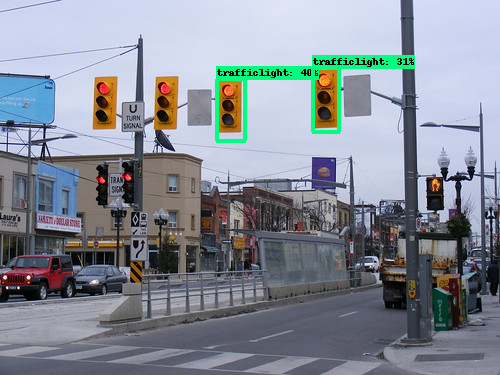

In [ ]:
# These are links to some sample images for testing:

gdown.download("https://drive.google.com/uc?export=download&id=1GG8l6W9U13G7Pq7NodSty6jcCmNALVmf", TEST_IMAGE_PATH)
plot_detections(TEST_IMAGE_PATH)

Downloading...
From: https://drive.google.com/uc?export=download&id=1Fd_qrsfrUtuJFpbBnd9C60hBPdbvVgzT
To: /content/Tensorflow/testing/test_images/test_image.png
100%|██████████| 184k/184k [00:00<00:00, 71.8MB/s]


Model runtime: 0.066 seconds


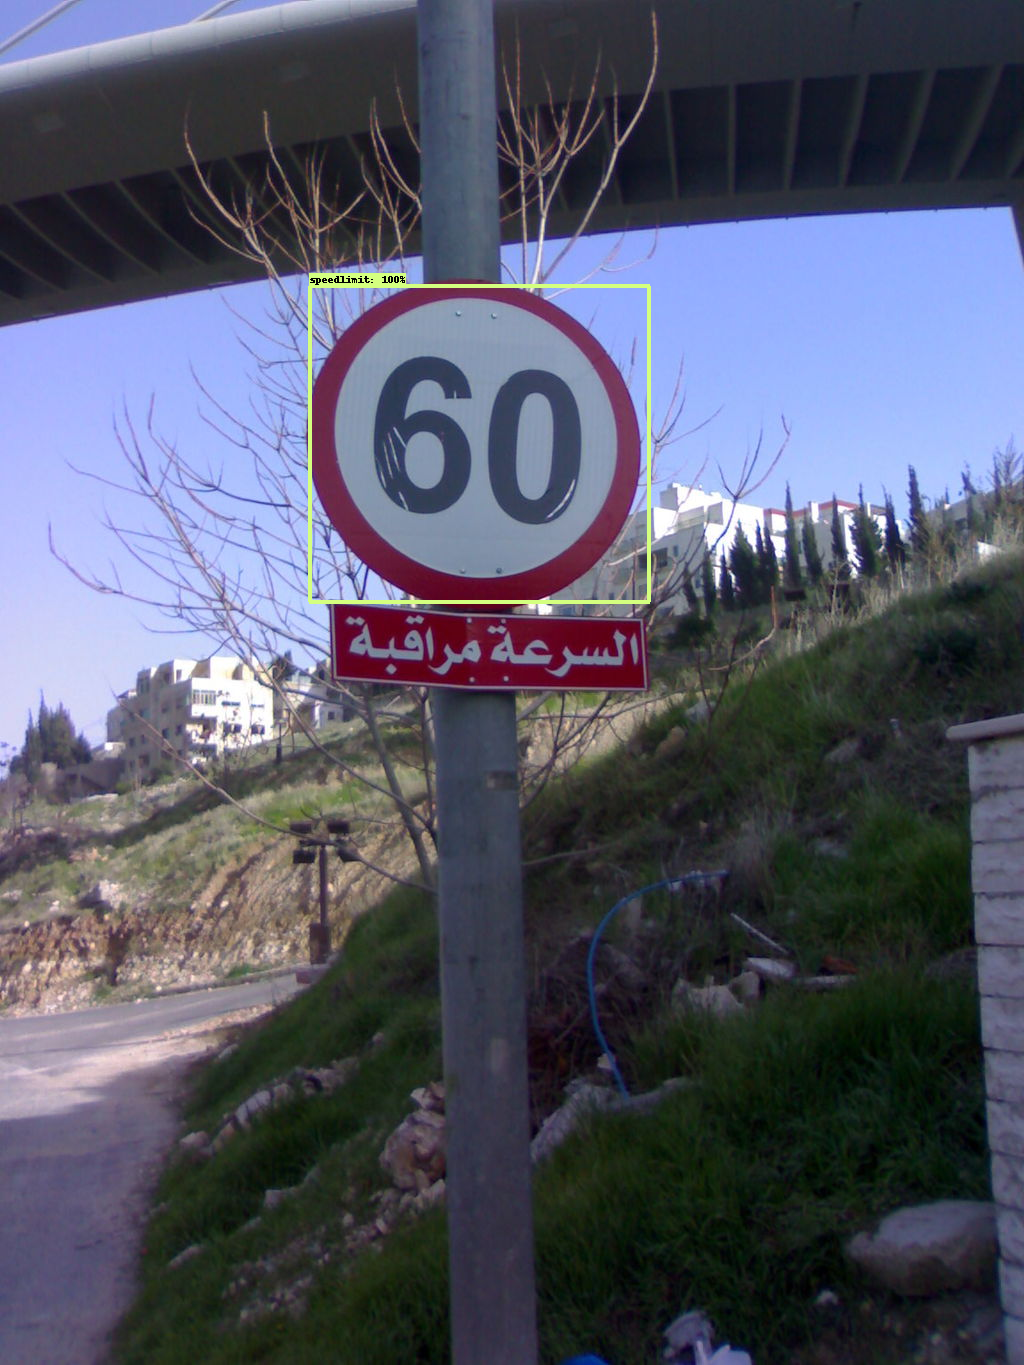

In [ ]:
gdown.download("https://drive.google.com/uc?export=download&id=1Fd_qrsfrUtuJFpbBnd9C60hBPdbvVgzT", TEST_IMAGE_PATH)
plot_detections(TEST_IMAGE_PATH)

In [ ]:
gdown.download("https://drive.google.com/uc?export=download&id=1GI74d5XWs3zcui6Eyv-HBZ91qlZT4qVf", TEST_IMAGE_PATH)
plot_detections(TEST_IMAGE_PATH)

Downloading...
From: https://drive.google.com/uc?export=download&id=1GNAdKNAGOGnQfwdSNWlpOnhqnZJOQB9q
To: /content/Tensorflow/testing/test_images/test_image.png
100%|██████████| 14.1k/14.1k [00:00<00:00, 37.5MB/s]

Model runtime: 0.078 seconds


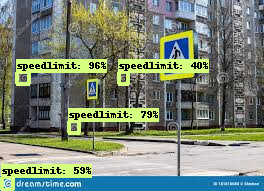

In [ ]:
gdown.download("https://drive.google.com/uc?export=download&id=1GNAdKNAGOGnQfwdSNWlpOnhqnZJOQB9q", TEST_IMAGE_PATH)
plot_detections(TEST_IMAGE_PATH)